# Perceptron Implementation

In this notebook, we will be implementing the perceptron algorithm and testing it on the wine dataset. 

As seen in the below picture, the perceptron is a single neuron that takes in multiple features as inputs and eventually decide to activate or not activate. The algorithm will either return a +1 or -1, if the final prediction passes a certain cutoff. 

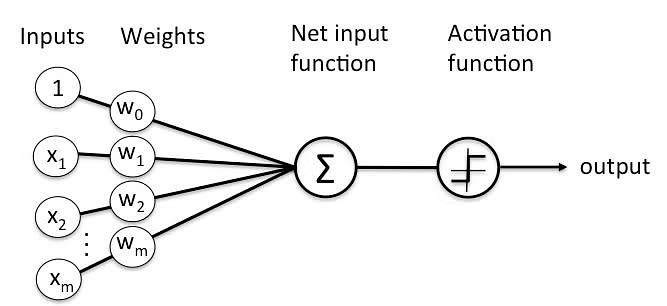


Pre-Activation Function: $z = w_1 x_1 + w_2 x_2 + ... w_m x_m + w_0$

Post-Activation Function: $a = \phi (z)$

Activation Function: $a$ = $1$ if $z > 0$, $-1$ if $z < 0$

First, we will load in the dataset. The dataset offers three categories of wines. Since the perceptron is a binary classification problem, we will only choose two to classify. 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

sns.set_theme()

wine = load_wine()

wine_data = wine['data']
wine_target = wine['target'].reshape(-1, 1)
new_data = np.concatenate((wine_data, wine_target), axis=1)
wine = pd.DataFrame(data=new_data, columns=wine['feature_names'] + ['target'])

wine = wine[wine['target'] < 2.]

# Unique classes
wine['target'].unique()

array([0., 1.])

We will focus on two features of the wine dataset in order to show the importance of linearly separable data. 

In [83]:
X = wine[['alcohol', 'flavanoids']].values
y = wine['target'].values

print(wine.keys())

Now, we can actually implement our perceptron algorithm through a python class. This class will hold a scaling value, epochs, weights (including bias), and training errors. It will also include methods for training, inputting data, and making predictions.

In [84]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
    
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
                if errors == 0:
                    return self
                else:
                    return self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

Now, we can create an instance of the Perceptron and try it on our dataset. 

In [85]:
# Create instance of Perceptron class with 10k epochs
Percept = Perceptron(epochs = 100_000)

# Train the Perceptron on the training dataset
Percept.train(X, y)

# Obtain the predictions
y_predictions = Percept.predict(X)

booleans = ((y == y_predictions))

print(np.sum(booleans == False))
print(y_predictions)

130
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


ValueError: Filled contours require at least 2 levels.

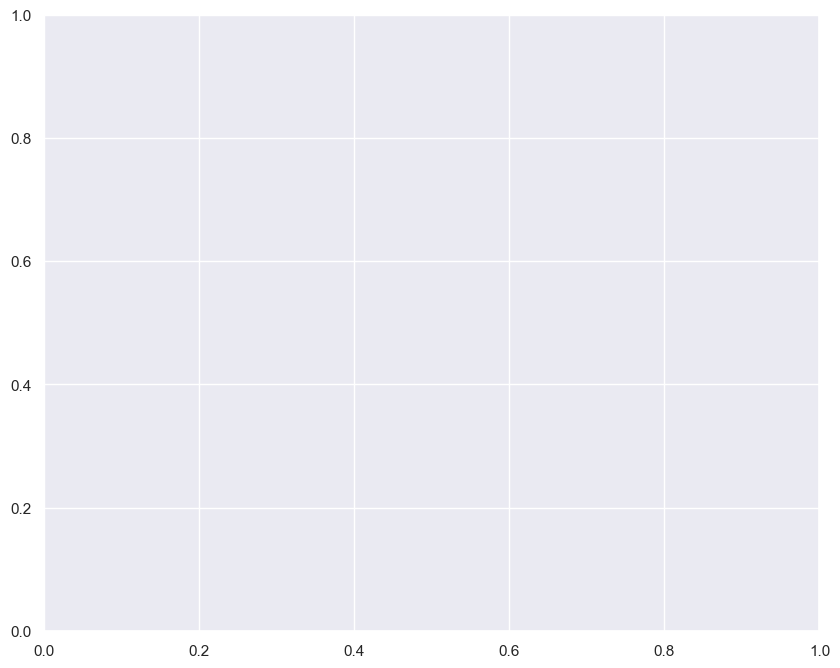

In [90]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y.astype('int'), clf = Percept)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()